<a href="https://colab.research.google.com/github/prithvi394/DV_Team7/blob/main/DataVisualization_Team7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Team7'
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!apt install libspatialindex-c4v5
!pip install pysal
!pip install pycountry

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Team7
Requirement already up-to-date: geopandas in /usr/local/lib/python3.7/dist-packages (0.9.0)
Requirement already up-to-date: pyshp in /usr/local/lib/python3.7/dist-packages (2.1.3)
Requirement already up-to-date: shapely in /usr/local/lib/python3.7/dist-packages (1.7.1)
Requirement already up-to-date: descartes in /usr/local/lib/python3.7/dist-packages (1.1.0)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-c4v5 is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


'\ncon = sqlite3.Connection(\'newdb.sqlite\')\ncur = con.cursor()\n\nresult_dict={}\n\ncur.execute("Select degree,COUNT(degree) from adult where salary= \' <=50K\' group by degree ;")\n\nfor record in cur.fetchall():\n  #inner_map={}\n  #print(record)\n  inner_map={"Salary <= 50k" : record[1], "Salary > 50k" : 0}\n  #print(inner_map)\n  result_dict[record[0]]=inner_map\n\nprint (result_dict)\nprint("--------------------")\n\ncur.execute("Select degree,COUNT(degree) from adult where salary= \' >50K\' group by degree ;")\n\nfor record_dash in cur.fetchall():\n  #print(record_dash)\n  if record_dash[0] in result_dict:\n    updated_inner_map = result_dict.get(record_dash[0])\n    updated_inner_map[\'Salary > 50k\']=record_dash[1]\n    #print(updated_inner_map)\n    result_dict[record_dash[0]]=updated_inner_map\n  else:\n    new_unique_map={"Salary <= 50k" : 0 , "Salary > 50k" : record_dash[1]}\n    result_dict[record_dash[0]]=new_unique_map\n\nprint (result_dict)\nprint("------------------

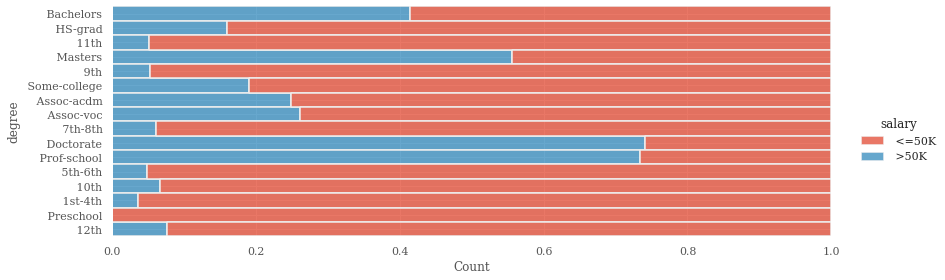

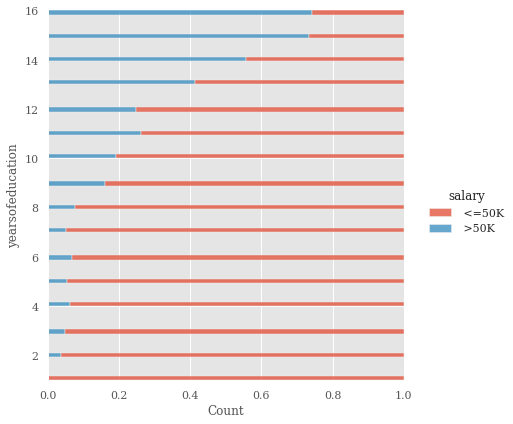

In [24]:
# Analysis for degree level vs salaryimport sqlite3

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plot
from google.colab import files
import sqlite3
import seaborn as sns

con = sqlite3.Connection('newdb.sqlite')
cur = con.cursor()


age = pd.read_sql_query("SELECT degree, salary FROM adult", con)
sns.displot(data=age, y="degree", hue="salary", multiple="fill", height=4, aspect=3)



yearsofeducation= pd.read_sql_query("SELECT yearsofeducation, salary FROM adult", con)
sns.displot(data=yearsofeducation, y="yearsofeducation", hue="salary", multiple="fill", height=6, aspect=1)

'''
con = sqlite3.Connection('newdb.sqlite')
cur = con.cursor()

result_dict={}

cur.execute("Select degree,COUNT(degree) from adult where salary= ' <=50K' group by degree ;")

for record in cur.fetchall():
  #inner_map={}
  #print(record)
  inner_map={"Salary <= 50k" : record[1], "Salary > 50k" : 0}
  #print(inner_map)
  result_dict[record[0]]=inner_map

print (result_dict)
print("--------------------")

cur.execute("Select degree,COUNT(degree) from adult where salary= ' >50K' group by degree ;")

for record_dash in cur.fetchall():
  #print(record_dash)
  if record_dash[0] in result_dict:
    updated_inner_map = result_dict.get(record_dash[0])
    updated_inner_map['Salary > 50k']=record_dash[1]
    #print(updated_inner_map)
    result_dict[record_dash[0]]=updated_inner_map
  else:
    new_unique_map={"Salary <= 50k" : 0 , "Salary > 50k" : record_dash[1]}
    result_dict[record_dash[0]]=new_unique_map

print (result_dict)
print("--------------------")

plot.style.use('ggplot')
plot.rcParams['font.size'] = 25
plot.rcParams["font.family"] = "serif"

dataframe = pd.DataFrame.from_dict(result_dict).T
dataframe.plot.barh(rot=15,figsize=(16,16),width=0.85,color={'green','blue'})

'''

#keys = list(result_dict.keys())
#perc =  [float(i[:-1]) for i in my_dict.values()]
#sns.barplot(x=keys, y=perc) 


#dataframe.plot(figsize=(10,10))
#plot.savefig("abc.png")
#files.download("abc.png") 


#for p in barplot.patches:
#barplot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# convert to data frame 
# .T transposes letter categories to the x-axis
#dataframe = pd.DataFrame.from_dict(result_dict,orient="index").T

# plot grouped bar chart
#dataframe.plot(kind="bar")

[Text(0, 0, ' United-States'),
 Text(0, 0, ' Cuba'),
 Text(0, 0, ' Jamaica'),
 Text(0, 0, ' India'),
 Text(0, 0, ' Unknown'),
 Text(0, 0, ' Mexico'),
 Text(0, 0, ' South'),
 Text(0, 0, ' Puerto-Rico'),
 Text(0, 0, ' Honduras'),
 Text(0, 0, ' England'),
 Text(0, 0, ' Canada'),
 Text(0, 0, ' Germany'),
 Text(0, 0, ' Iran'),
 Text(0, 0, ' Philippines'),
 Text(0, 0, ' Italy'),
 Text(0, 0, ' Poland'),
 Text(0, 0, ' Columbia'),
 Text(0, 0, ' Cambodia'),
 Text(0, 0, ' Thailand'),
 Text(0, 0, ' Ecuador'),
 Text(0, 0, ' Laos'),
 Text(0, 0, ' Taiwan'),
 Text(0, 0, ' Haiti'),
 Text(0, 0, ' Portugal'),
 Text(0, 0, ' Dominican-Republic'),
 Text(0, 0, ' El-Salvador'),
 Text(0, 0, ' France'),
 Text(0, 0, ' Guatemala'),
 Text(0, 0, ' China'),
 Text(0, 0, ' Japan'),
 Text(0, 0, ' Yugoslavia'),
 Text(0, 0, ' Peru'),
 Text(0, 0, ' Outlying-US(Guam-USVI-etc)'),
 Text(0, 0, ' Scotland'),
 Text(0, 0, ' Trinadad&Tobago'),
 Text(0, 0, ' Greece'),
 Text(0, 0, ' Nicaragua'),
 Text(0, 0, ' Vietnam'),
 Text(0, 0,

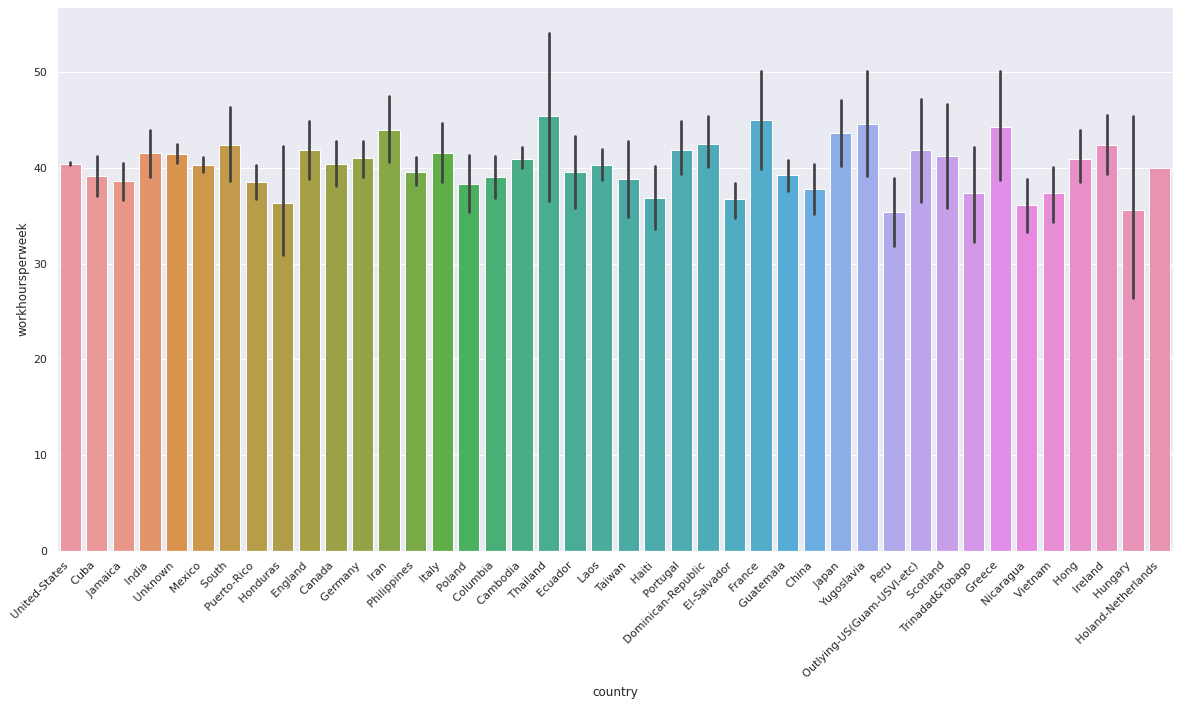

In [25]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import csv
from google.colab import files
import sqlite3

import seaborn as sns
#sns.boxplot(x='label',y='age',data=df)

import seaborn as sns
sns.set(style="darkgrid")
from matplotlib.pyplot import figure

%matplotlib inline

con = sqlite3.Connection('newdb.sqlite')
cur = con.cursor()


country = pd.read_sql_query("SELECT workhoursperweek , salary, country FROM adult ", con)
country['country'] = country['country'].str.replace("?","Unknown")

import seaborn as sns
plt.figure(figsize=(20,10))
# use Seaborn styles
#sns.set(style="darkgrid")
#pd.pivot_table(country, index = 'country', columns = 'salary', aggfunc= 'count').plot(kind= 'barh', figsize= (9,9))
#plt.xlabel("Salary USD")

#p = sns.barplot(x='country', y='workhoursperweek',hue = 'salary', data=country)
#p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment ='right')

#p = sns.displot(y='country', hue = 'salary', data=country)
#p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment ='right')

p = sns.barplot(x='country', y='workhoursperweek', data=country)
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment ='right')

#sns.scatterplot(x='country', hue='salary', data=country)

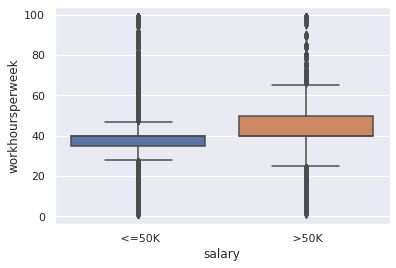

In [26]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import csv
from google.colab import files
import sqlite3

#colnames= ['age','workclass','fnlwgt','edu','edu_num','maritial','occ','relationship',
#'race','sex','capital-gain','capital-loss','hours-per-week','country','label']

#df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",names=colnames)
#df.boxplot(column='hours-per-week',by='label')

#import seaborn as sns
#sns.boxplot(x='label',y='age',data=df)

import seaborn as sns
from matplotlib.pyplot import figure


%matplotlib inline


con = sqlite3.Connection('newdb.sqlite')
cur = con.cursor()

#plt.figure(figsize=(30,20))

workhoursperweek = pd.read_sql_query("SELECT workhoursperweek , salary, country FROM adult", con)
workhoursperweek['country'] = workhoursperweek['country'].str.replace("?","Unknown")
#p=sns.displot(data=workhoursperweek,x='country', y='workhoursperweek', hue='salary')
sns.boxplot(x='salary',y='workhoursperweek',data=workhoursperweek)
#p=sns.boxplot(x='country',y='workhoursperweek',hue='salary' , data=workhoursperweek)
#p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment ='right')

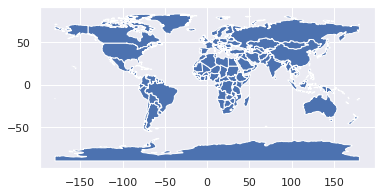

In [27]:
import geopandas as gpd
import pandas as pd
import numpy as np
import pysal as ps
import pycountry as pc
import csv
import matplotlib.pyplot as plot
from google.colab import files
import sqlite3
%matplotlib inline

#country = gpd.read_file('newdb.sqlite')
#country['country'] = country['country'].str.replace("?","Unknown")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.plot();


{' Married-civ-spouse': {'Salary <= 50k': 1021, 'Salary > 50k': 0}, ' Never-married': {'Salary <= 50k': 5904, 'Salary > 50k': 0}, ' Divorced': {'Salary <= 50k': 51, 'Salary > 50k': 0}, ' Widowed': {'Salary <= 50k': 0, 'Salary > 50k': 27}}
--------------------
{' Married-civ-spouse': {'Salary <= 50k': 1021, 'Salary > 50k': 1387}, ' Never-married': {'Salary <= 50k': 5904, 'Salary > 50k': 16}, ' Divorced': {'Salary <= 50k': 51, 'Salary > 50k': 2221}, ' Widowed': {'Salary <= 50k': 0, 'Salary > 50k': 27}}
--------------------


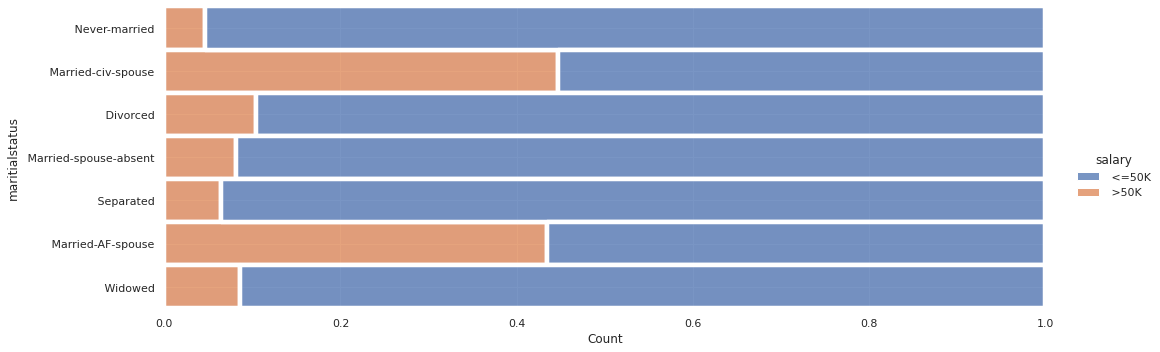

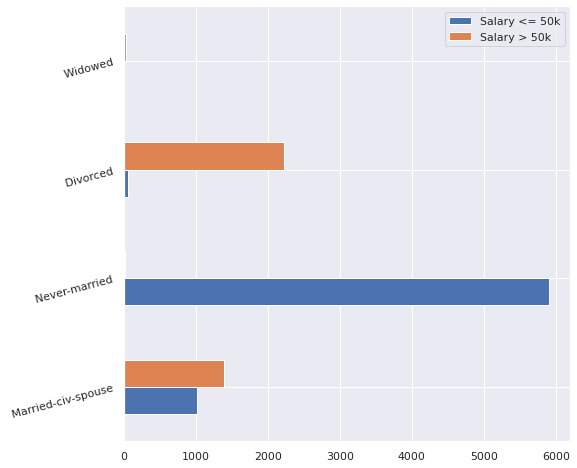

In [28]:
import seaborn as sns

con = sqlite3.Connection('newdb.sqlite')
cur = con.cursor()

maritialstatus = pd.read_sql_query("SELECT maritialstatus, salary FROM adult", con)
sns.displot(data=maritialstatus, y="maritialstatus", hue="salary", multiple="fill", height=5, aspect=3)

cur.execute("Select maritialstatus,COUNT(maritialstatus) from adult where salary= ' <=50K' group by degree ;")

for record in cur.fetchall():
  #inner_map={}
  #print(record)
  inner_map_ms={"Salary <= 50k" : record[1], "Salary > 50k" : 0}
  #print(inner_map)
  result_dict_ms[record[0]]=inner_map_ms

print (result_dict_ms)
print("--------------------")

cur.execute("Select maritialstatus,COUNT(maritialstatus) from adult where salary= ' >50K' group by degree ;")

for record_dash_ms in cur.fetchall():
  #print(record_dash)
  if record_dash_ms[0] in result_dict_ms:
    updated_inner_map_ms = result_dict_ms.get(record_dash_ms[0])
    updated_inner_map_ms['Salary > 50k']=record_dash_ms[1]
    #print(updated_inner_map)
    result_dict_ms[record_dash_ms[0]]=updated_inner_map_ms
  else:
    new_unique_map_ms={"Salary <= 50k" : 0 , "Salary > 50k" : record_dash_ms[1]}
    result_dict_ms[record_dash_ms[0]]=new_unique_map_ms

print (result_dict_ms)
print("--------------------")

dataframe = pd.DataFrame.from_dict(result_dict_ms).T
dataframe.plot.barh(rot=15,figsize=(8,8),width=0.5)


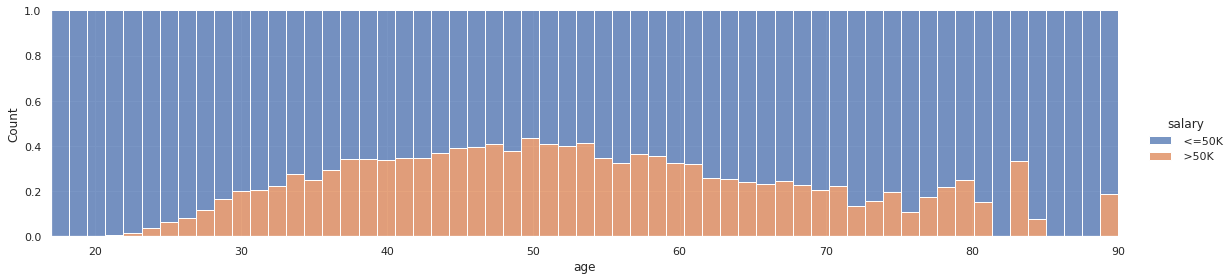

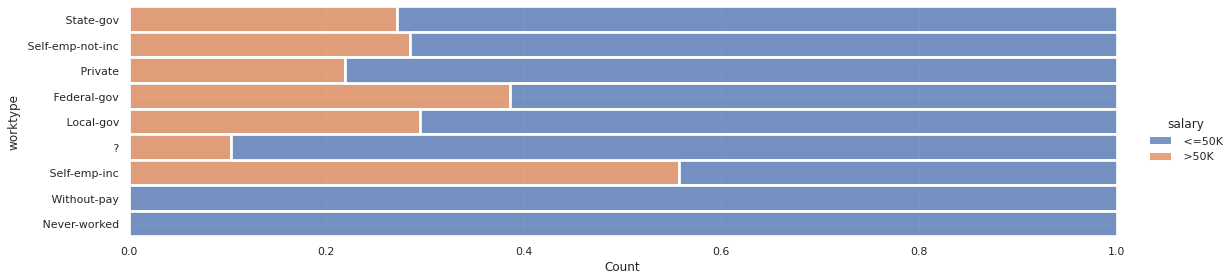

In [29]:
# AGE, WORKCLASS VS SALARY
import seaborn as sns

%matplotlib inline

# visualizations for Age and Workclass variables against Salary
age = pd.read_sql_query("SELECT age, salary FROM adult", con)
sns.displot(data=age, x="age", hue="salary", multiple="fill", height=4, aspect=4)
workclass = pd.read_sql_query("SELECT worktype, salary FROM adult", con)
sns.displot(data=workclass, y="worktype", hue="salary", multiple="fill", height=4, aspect=4)

{' Amer-Indian-Eskimo': {'Salary <= 50k': 275, 'Salary > 50k': 0}, ' Asian-Pac-Islander': {'Salary <= 50k': 763, 'Salary > 50k': 0}, ' Black': {'Salary <= 50k': 2737, 'Salary > 50k': 0}, ' Other': {'Salary <= 50k': 246, 'Salary > 50k': 0}, ' White': {'Salary <= 50k': 20699, 'Salary > 50k': 0}}
--------------------
{' Amer-Indian-Eskimo': {'Salary <= 50k': 275, 'Salary > 50k': 36}, ' Asian-Pac-Islander': {'Salary <= 50k': 763, 'Salary > 50k': 276}, ' Black': {'Salary <= 50k': 2737, 'Salary > 50k': 387}, ' Other': {'Salary <= 50k': 246, 'Salary > 50k': 25}, ' White': {'Salary <= 50k': 20699, 'Salary > 50k': 7117}}
--------------------


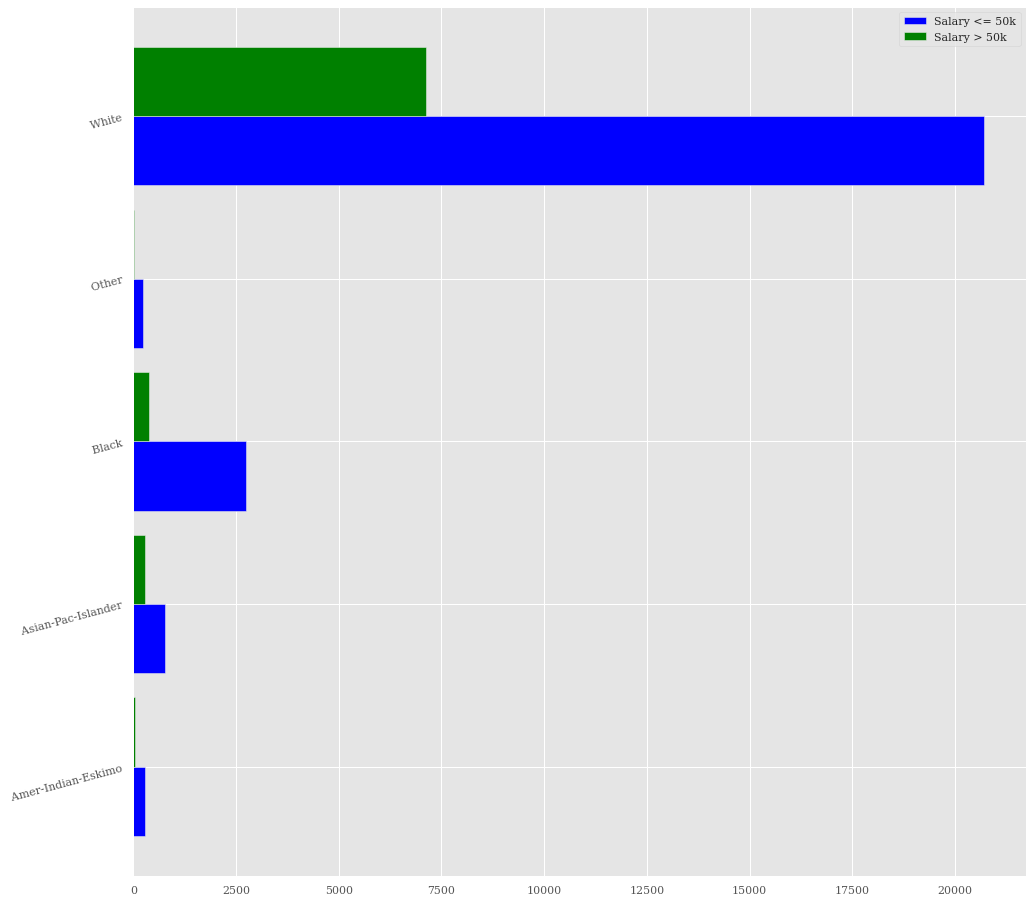

In [30]:
# Analysis for Race vs salary

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plot
from google.colab import files
import sqlite3


con = sqlite3.Connection('newdb.sqlite')
cur = con.cursor()

result_dict={}

cur.execute("Select race,COUNT(race) from adult where salary= ' <=50K' group by race ;")

for record in cur.fetchall():
  #inner_map={}
  #print(record)
  inner_map={"Salary <= 50k" : record[1], "Salary > 50k" : 0}
  #print(inner_map)
  result_dict[record[0]]=inner_map

print (result_dict)
print("--------------------")

cur.execute("Select race,COUNT(race) from adult where salary= ' >50K' group by race ;")

for record_dash in cur.fetchall():
  #print(record_dash)
  if record_dash[0] in result_dict:
    updated_inner_map = result_dict.get(record_dash[0])
    updated_inner_map['Salary > 50k']=record_dash[1]
    #print(updated_inner_map)
    result_dict[record_dash[0]]=updated_inner_map
  else:
    new_unique_map={"Salary <= 50k" : 0 , "Salary > 50k" : record_dash[1]}
    result_dict[record_dash[0]]=new_unique_map

print (result_dict)
print("--------------------")

plot.style.use('ggplot')
plot.rcParams['font.size'] = 25
plot.rcParams["font.family"] = "serif"

dataframe = pd.DataFrame.from_dict(result_dict).T
dataframe.plot.barh(rot=15,figsize=(16,16),width=0.85,color={'green','blue'})



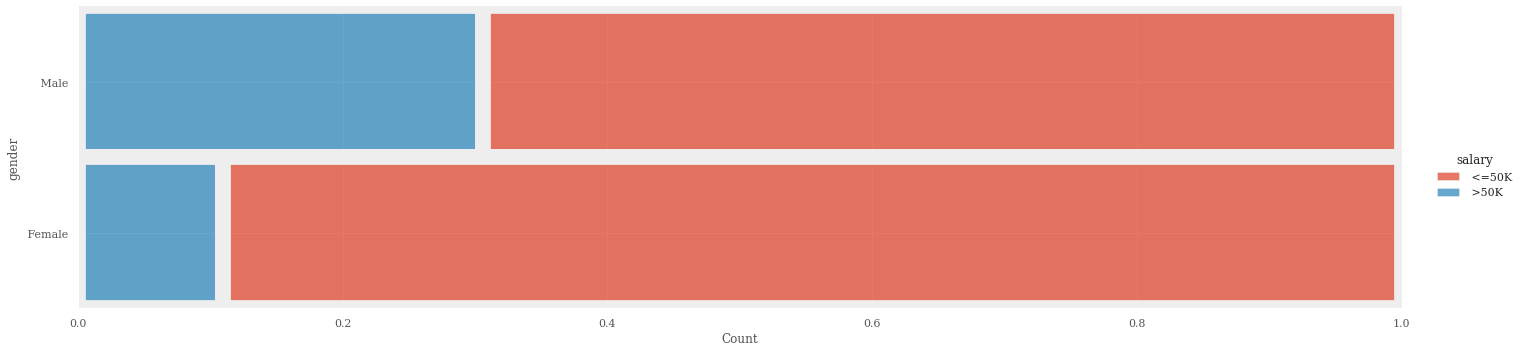

In [31]:
#Gender Vs Salary

import seaborn as sns
from matplotlib.pyplot import figure

%matplotlib inline

# visualizations for Gender against Salary
gender = pd.read_sql_query("SELECT gender, salary FROM adult", con)
sns.displot(data=gender, y="gender", hue="salary", multiple="fill", aspect=4)

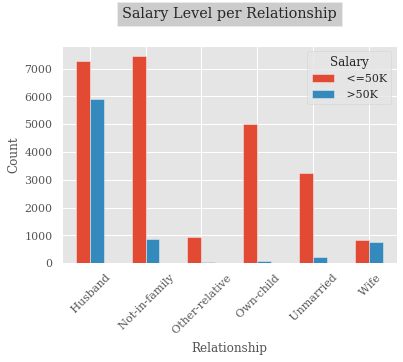

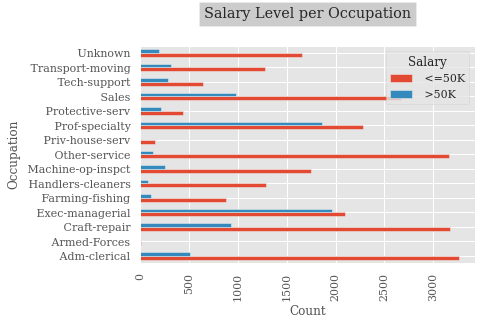

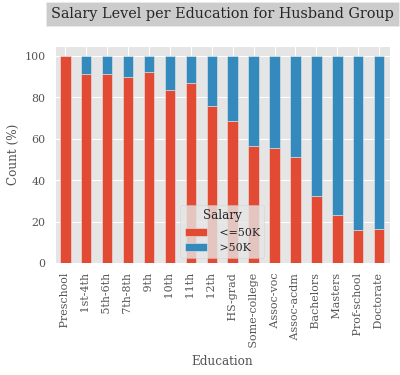

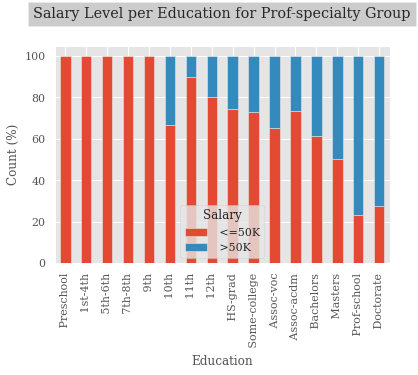

In [32]:
# Analysis for Relationship / Occupation vs Salary

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

original_data = pd.read_csv('adult.data.csv')

# show correlation between "Relatinoship" and "Salary"
fig_relationship = pd.crosstab(original_data['Relationship'],original_data['Salary']).plot.bar()
fig_relationship.set_title('Salary Level per Relationship', y=1.1, bbox={'facecolor':'0.8', 'pad':5})
fig_relationship.set_ylabel('Count')
plt.xticks(rotation='45')

# show correlation between "Occupation" and "Salary"
# replace "?" in occupation to "Unknown"
revised_data = original_data
revised_data['Occupation'] = revised_data['Occupation'].str.replace("?","Unknown") 
fig_occupation = pd.crosstab(revised_data['Occupation'],revised_data['Salary']).plot.barh()
fig_occupation.set_title('Salary Level per Occupation', y=1.1, bbox={'facecolor':'0.8', 'pad':5})
fig_occupation.set_xlabel('Count')
plt.xticks(rotation='vertical')

# match education no with education
list_of_edu_in_order = original_data.sort_values(['Education No'])['Education'].unique()
list_of_edu_no_in_order = np.arange(0,16)

# impact of education level on Group w/ Relatioship of "Husband"
Husband_data = original_data[(original_data.Relationship == ' Husband')]
fig_Husband = pd.crosstab(Husband_data['Education No'],
                          Husband_data['Salary']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True)
fig_Husband.set_title('Salary Level per Education for Husband Group', 
                            y=1.1, bbox={'facecolor':'0.8', 'pad':5})
fig_Husband.set_ylabel('Count (%)')
fig_Husband.set_xlabel('Education')
plt.xticks(list_of_edu_no_in_order, list_of_edu_in_order)

# impact of education level on Group w/ Occupation of "Prof-specialty"
specialty_data = original_data[(original_data.Occupation == ' Prof-specialty')]
# print(not_in_family_data)
fig_specialty_data = pd.crosstab(specialty_data['Education No'],
                                 specialty_data['Salary']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True)
fig_specialty_data.set_title('Salary Level per Education for Prof-specialty Group', 
                            y=1.1, bbox={'facecolor':'0.8', 'pad':5})
fig_specialty_data.set_ylabel('Count (%)')
fig_specialty_data.set_xlabel('Education')
plt.xticks(list_of_edu_no_in_order, list_of_edu_in_order)

plt.show()